<a href="https://colab.research.google.com/github/Ninadrmore1999/ML-projects-/blob/main/Cars24_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

In [14]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR


Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 16.5MB/s]


In [15]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


### Target variable encoding

In [16]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

In [17]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Univariate

In [22]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [24]:
model.coef_

array([0.9967642])

In [25]:
model.intercept_

np.float64(0.0015237505846132926)

In [26]:
y_hat = model.predict(X1)

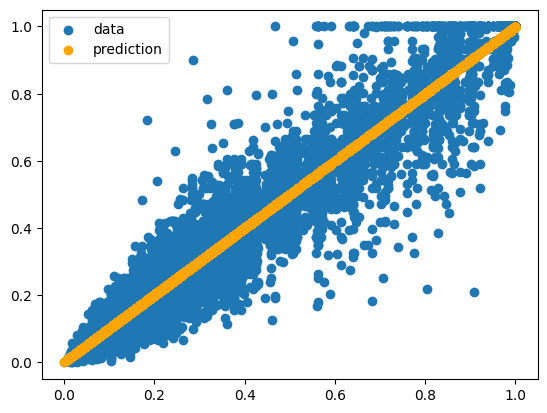

In [27]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Notice,
- how the predicted values form a line similar to a regression line.

### Multivariate

Let's now generalize our model for the whole data.

In [28]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [31]:
model.intercept_

np.float64(-0.011456351039686896)

/tmp/ipython-input-2294406906.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


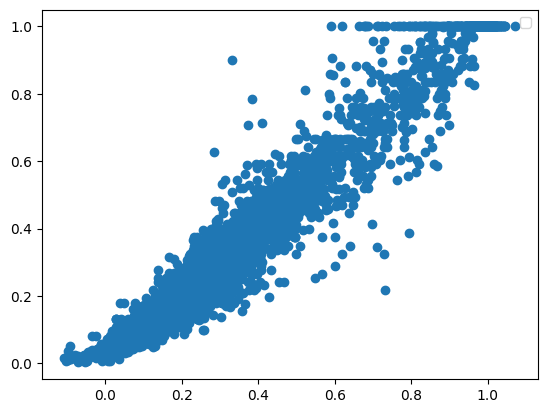

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

## Evaluation Metric

#### Let's check the performance of our previously trained model on test data.

\
LinearRegression's default `.score()` function uses R2 score to evaluate the data.

In [33]:
model.score(X_train, y_train)

0.9457591024750988

In [34]:
model.score(X_test, y_test)

0.9458843076992296

## Model Interpretability

### Understanding our model

In [35]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

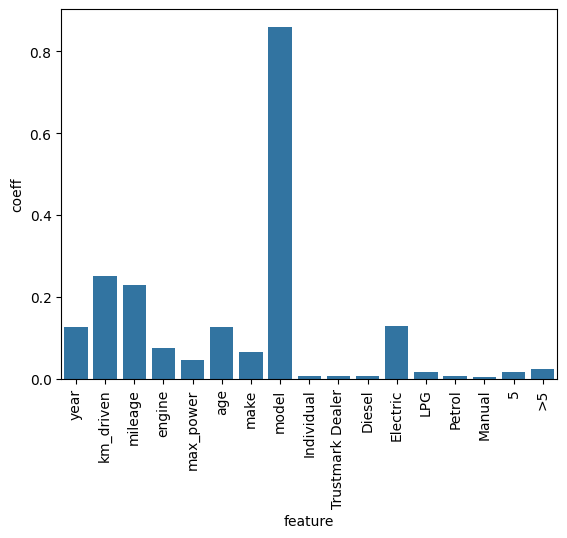

In [36]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [37]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'model'

In [38]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'Manual'

So,
- `year` is most important feature,
- while `manual` is the least important.

### Linear Regression

In [39]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations

Next we define our predict function.

It's simply $X*W + b$

In [40]:
def predict(self, X):
  return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

Note:

We are using this notation of adding a function, as seen from the last line `LinearRegression.predict=predict`, since we aren't defining the class in one go

Finally we define our evaluation metric, R2 Score

In [41]:
def r2_score(self, X, y):
  y_ = self.predict(X)
  ss_res = np.sum((y-y_)**2)
  ss_tot = np.sum((y- y.mean())**2)
  score = (1- ss_res/ss_tot)
  return score

LinearRegression.score=r2_score

## Optimization

Now, we come to our main task of training the model.

If you remember,
- our objective was to find the hyperplane in $d+1$ dimensions
- such that this is very close to the $d+1$ dimensional points.

In [42]:
def update_weights(self):
  Y_pred = self.predict( self.X )
  # calculate gradients
  dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
  db = - 2*np.sum(self.Y - Y_pred)/self.m
  # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
  # update weights
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db
  return self

LinearRegression.update_weights=update_weights

<!-- **Note:**
- Using 1 point of updation is called stochastic gradient descent.
- Whereas if we update the weights after m points, it's called batch gradient descent. -->

<!-- **Quiz** (Check your understanding)
```
Which variant of Gradient Descent uses the entire dataset to compute the gradient at each iteration?
A) Mini-batch Gradient Descent
B) Stochastic Gradient Descent
C) Batch Gradient Descent
D) Regularized Gradient Descent

Correct Answer: C) Batch Gradient Descent

``` -->

Now finally, since we have all the required functions, </br>
let's code the `fit` function now to fit our model to our data.

In [43]:
def fit(self, X, Y):
  # no_of_training_examples, no_of_features
  self.m, self.d = X.shape
  # weight initialization
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.Y = Y
  self.error_list=[]
  # gradient descent learning
  for i in range(self.iterations):
    self.update_weights()
    Y_pred=X.dot(self.W)+self.b
    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)
  return self

LinearRegression.fit=fit

Let's train our model now on our data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 37.4MB/s]


In [45]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [46]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [48]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [49]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [50]:
lr.score(X_train, y_train)

np.float64(0.9101033692790105)

In [51]:
lr.score(X_test, y_test)

np.float64(0.9075347558295035)

In [52]:
lr.W

,0
year,0.125722
km_driven,-0.047847
mileage,-0.050197
engine,0.093654
max_power,0.154132
age,-0.125722
make,0.189528
model,0.371064
Individual,-0.025478
Trustmark Dealer,-0.004997


In [53]:
lr.b

np.float64(0.0011317414350942192)

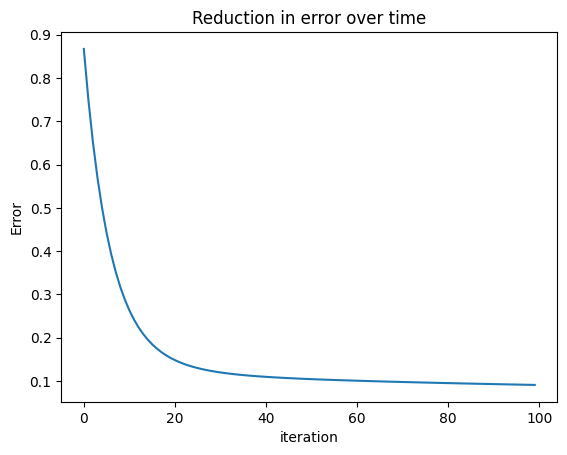

In [54]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

Let's implement it for our earlier model and test data.

In [55]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9114445609103706


First we will download our data.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 45.7MB/s]


In [57]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [58]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [60]:
y_train = np.array(y_train)

Now, let's train our model on the data.

In [61]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:17:20   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  

Let's look at few of the variables in this table:

- Dep. Variable: This column displays the name of the dependent variable being predicted in the regression.

- Model: It provides a concise representation of the model type and method used, such as "OLS" (Ordinary Least Squares).

- R-squared: Represents the coefficient of determination (R-squared) value.

- Adj. R-squared: This is the adjusted R-squared value, which accounts for the number of predictors in the model and adjusts the R-squared accordingly.

The prediction is same as scikit learn

In [62]:
results.predict(X_sm)

,0
3443,-0.354511
16090,-0.476414
11070,-0.359932
19214,-0.121763
17843,-0.656579
...,...
1099,2.335550
18898,-0.334020
11798,0.398398
6637,2.564373


In [63]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:17:21   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

#### Multicollinearity and implementation
- When one or more input variables exhibhit strong correlation
- One variable is enough to be part of the model.

In [64]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.30
10,Diesel,17.30
16,>5,13.04
15,5,11.75
3,engine,6.26
7,model,5.78
4,max_power,5.00
2,mileage,3.22


#### Note : VIF values tends to be infinity when there is a perfect correlation between the variables

Removing the variable with highest VIF

In [66]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:17:22   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004      0.002  

As we see, there's no drop in R-sq. and adj. R-sq. value even after removing the variable

Let's now keep on removing features till we
- either have a feature with vif<5

or
- have the model's adj. r2 score go below 0.85

In [67]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    model
VIF          5.75
Name: 0, dtype: object
Current adj.R2 0.8318553555450336
Features removed: 4
List of features removed: ['year', 'Petrol', '>5', 'engine']


In [68]:
print(vif)
print(sm_model.summary())

            Features   VIF
0              model  5.75
1          max_power  3.31
2               make  3.16
3            mileage  2.28
5                age  1.88
6             Manual  1.77
4             Diesel  1.66
7                  5  1.47
9          km_driven  1.20
8           Electric  1.18
10        Individual  1.08
11  Trustmark Dealer  1.02
12               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     6538.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:17:24   Log-Likelihood:                -8348.2
No. Observations:               15856   AIC:                         1.672e+04
Df Residuals:                   15843   BIC:                         

Lets See how is the error distribution for Car24

In [69]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [70]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

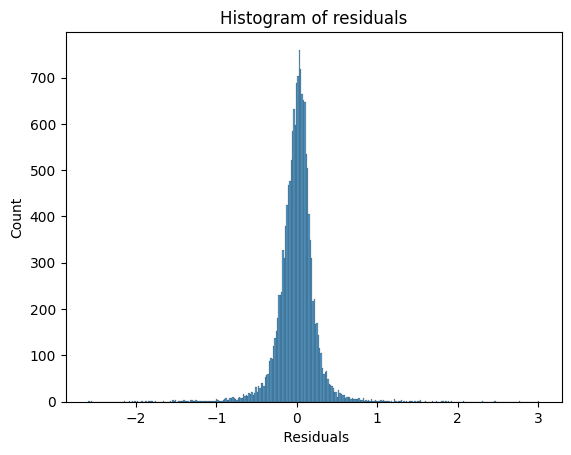

In [71]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

This looks like a normal distribution, with a high mean and low S.D.

Let's do a normality test to check if the distribution is actually normal.

Recall:
- You must have studied Shapiro Wilk test in statistics module.

In [72]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(0.8526019402961729)

Closer the value to 1, more is the normality.

In this case, a value of 0.85 denotes a high level of normality for the error distribuiton

- If the distribution of errors is gaussian distribution then the assumption of error being normally distributed is being sastified (sanity check)



# 4.Heteroskedasticity should not exist

<!-- <img src='https://drive.google.com/uc?id=1_K0iQfncOvnbO4S3kQjQsX2Rsr2907cr' width=800> -->

Lets implement heteroskedasticity in Cars24

In [73]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

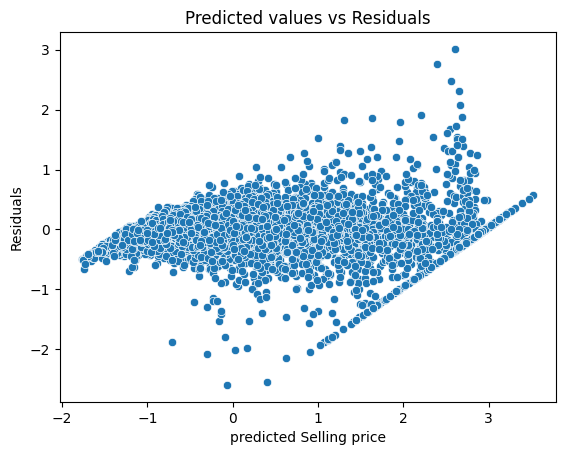

In [74]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Notice that As we go from left to right,the spread of  errors is almost constant

#### What can we understand from this constant Residuals?
- We can assume that heteroskedasticity does not exist in our data
- There are outliers present in the dataset

We can also use "Goldfeld-Quandt Test" to verify our assumptions


### Using Goldfeld Quandt Test to check homoskedacity

- This test is used to test the presence of Heteroscedasticity in the given data
- The Goldfeld-Quandt test works by removing some number of observations located in the center of the dataset, then testing to see if the spread of residuals is different from the resulting two datasets that are on either side of the central observations.

In [75]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', np.float64(1.0084600947540285)),
 ('p-value', np.float64(0.35392832073679753))]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
- p-value of 0.353 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.


**Note**:
In case we encounter heteroskedacity, we can use the following methods to remove the same:
- We can use transformations such as log, sq.rt., or boxcox transformation to remove heteroskedacity.
- Also, removing outliers will help.


# 5. No Autocorrelation

#### Summing up

- Summing up the Assumptions:
  - There exist a linear function
  - There is no auto correlation (related to time series)
  - Errors are normally distributed
  - No heteroskedasticity
  - No multicollinearity

We also have a fundamental assumption: $x^{(i)}, y^{(i)}$ are a random sample